<a href="https://colab.research.google.com/github/sp-au-mu-nl/PythonMedia/blob/main/notebook/chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import IPython

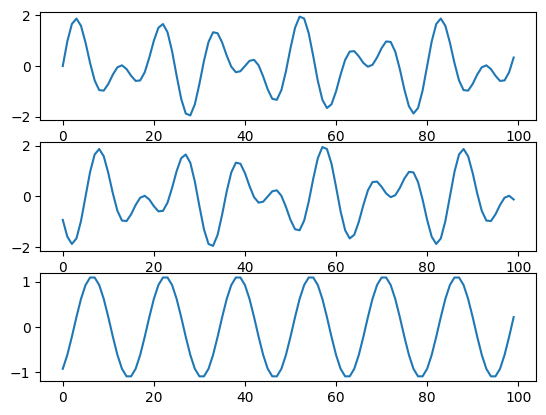

In [2]:
fs=8000
t=np.arange(0,1,1/fs)
s=np.sin(2*np.pi*800*t)+np.sin(2*np.pi*500*t)
IPython.display.display(IPython.display.Audio(s,rate=fs))
rg=np.arange(0,100)
plt.subplot(3,1,1); plt.plot(s[rg])
sd=np.roll(s,5)
plt.subplot(3,1,2); plt.plot(sd[rg])
ssd=s+sd
plt.subplot(3,1,3); plt.plot(ssd[rg])
IPython.display.display(IPython.display.Audio(sd,rate=fs))
IPython.display.Audio(ssd,rate=fs)

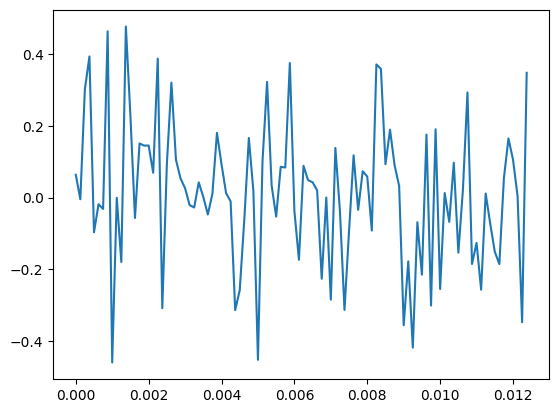

In [3]:
r=np.random.standard_normal(t.shape)
r=0.8*r/np.max(np.abs(r))
n=np.arange(100)
plt.plot(t[n],r[n])
IPython.display.Audio(r,rate=fs)

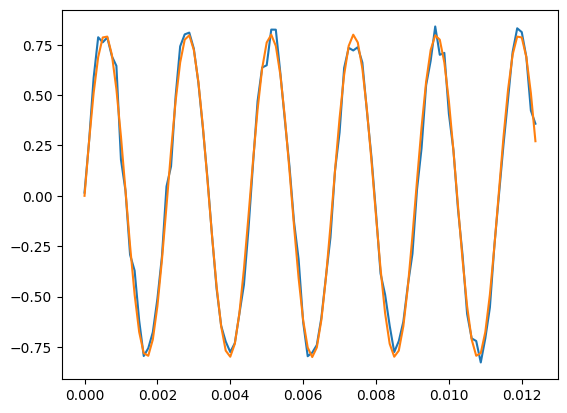

In [4]:
s=np.sin(2*np.pi*440*t)
sn=0.8*s+0.25*r
n=np.arange(100)
plt.plot(t[n],sn[n],t[n],0.8*s[n])
IPython.display.Audio(sn,rate=fs)

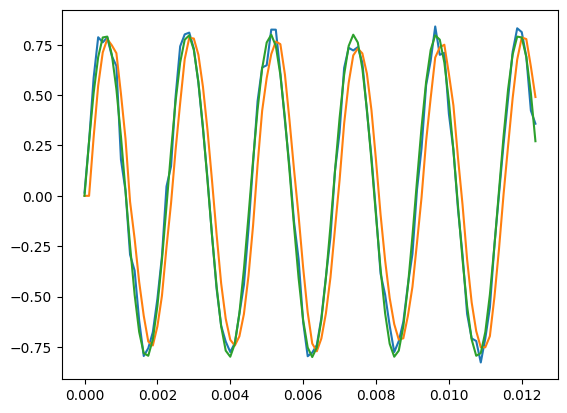

In [5]:
y=np.zeros(sn.shape)
pn=3
for k in np.arange(pn-1,t.shape[0]):
  y[k]=np.mean(sn[k-pn+1:k+1])

plt.plot(t[n],sn[n],t[n],y[n],t[n],0.8*s[n])
IPython.display.Audio(sn,rate=fs)

In [6]:
IPython.display.Audio(y,rate=fs)

In [7]:
IPython.display.Audio(s,rate=fs)

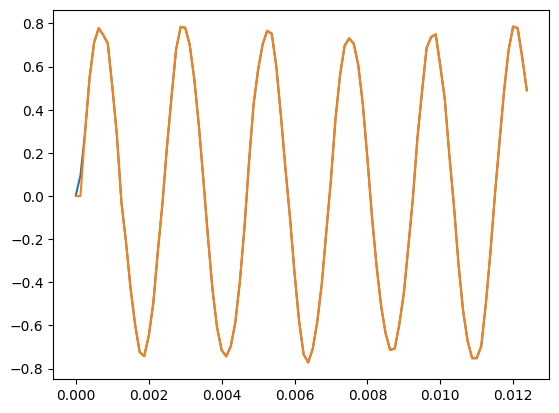

In [8]:
h=np.ones((3,))/3
y2=np.convolve(h,sn)
plt.plot(t[n],y2[n],t[n],y[n])

In [9]:
imp=np.zeros((1024,))
imp[0]=1

<StemContainer object of 3 artists>

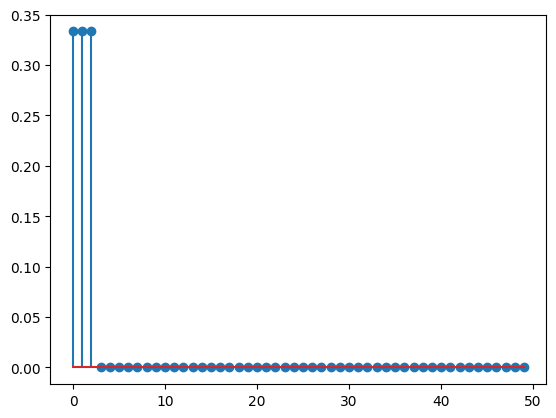

In [10]:
h_imp=np.convolve(h,imp)
plt.stem(h_imp[:50])

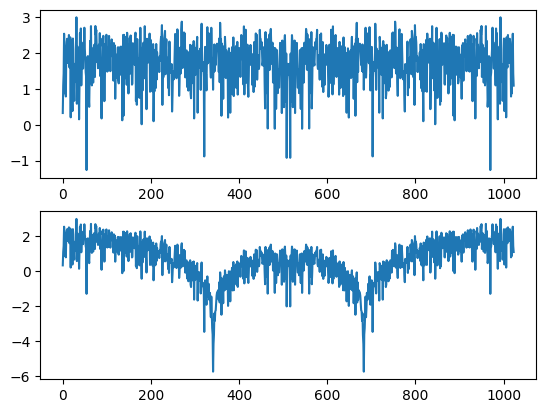

In [11]:
S_imp=np.fft.fft(h_imp,1024)
wn=np.random.standard_normal(S_imp.shape)
wn=0.8*wn/np.max(np.abs(wn))
WN=np.fft.fft(wn)
WN_filtered=WN*S_imp
plt.subplot(2,1,1); plt.plot(np.log(np.abs(WN)))
plt.subplot(2,1,2); plt.plot(np.log(np.abs(WN_filtered)))

<StemContainer object of 3 artists>

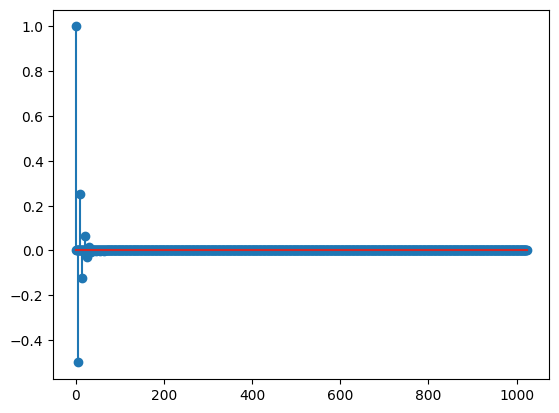

In [12]:
a=np.array([1,0,0,0,0,0.5])
b=np.array([1])
ir_iir=signal.lfilter(b,a,imp)
plt.stem(ir_iir)

<StemContainer object of 3 artists>

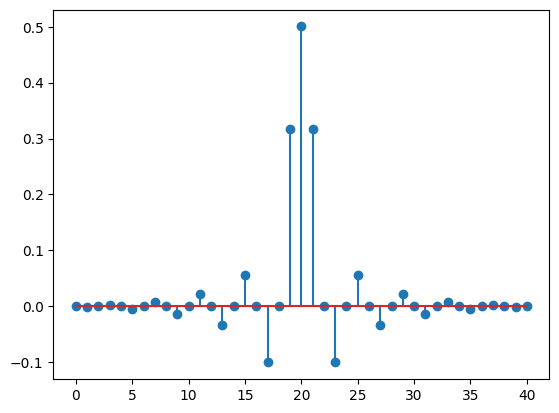

In [13]:
h_lp2k=signal.firwin(41,0.5)
plt.stem(h_lp2k )

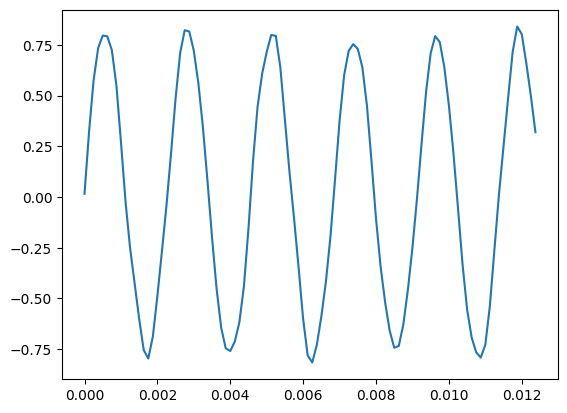

In [14]:
snf=signal.filtfilt(h_lp2k,1,sn)
plt.plot(t[n],snf[n])
IPython.display.Audio(snf,rate=fs)

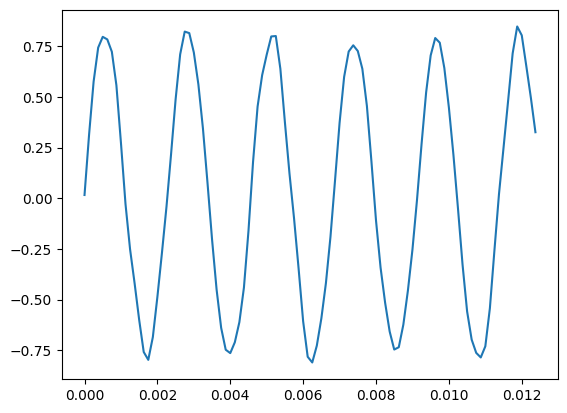

In [15]:
b,a=signal.butter(11,0.5)
snf=signal.filtfilt(b,a,sn)
plt.plot(t[n],snf[n])
IPython.display.Audio(snf,rate=fs)